# 05 Processing Study

In this notebook, we load the raw data, process it in different ways and test the best model found in `04_logistic_reg.ipynb` with these different datasets

In [10]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Imports
import sys
import os

import numpy as np

from data_loading import load_data
from data_processing import preprocess_features
from data_exploration import print_dataset_info, analyze_features_dict, select_features_based_on_correlation
from utils import stratified_split
from models import (
    logistic_regression,
    reg_l2_logistic_regression,
    reg_l1_logistic_regression,
)
from train_pipeline import train_and_test, hyperparameters_grid_search

#### Raw data loading

In [5]:
# Load and preprocessed data (~2 minutes)
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path)

Loading raw data...
Data loaded.


#### Different processed datasets generation

In [6]:
# Standard processing
x_train_std, x_test_std, feature_names_std, feature_dict_std = preprocess_features(x_train, y_train, x_test, feature_names, feature_dict)

print()
print_dataset_info(x_train_std, y_train, x_test_std, feature_dict_std)
analyze_features_dict(feature_dict_std)

Preprocessing data...
Data preprocessed.

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
440 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 440

Number of categorical features: 399
Number of numerical features: 41

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 399

Numerical feature subtypes:
  undefined: 41

Encoding types:
  ordinal: 30
  binary: 74
  one-hot: 285
  past_30_days: 2
  frequency: 8


In [17]:
# Using median instead of mean
x_train_med, x_test_med, feature_names_med, feature_dict_med = preprocess_features(
    x_train, y_train, x_test, feature_names, feature_dict, imputation_strategy="mean"
)

Preprocessing data...
Data preprocessed.


In [18]:
# Keeping only features with less than 50% missing values
x_train_50, x_test_50, feature_names_50, feature_dict_50 = preprocess_features(
    x_train, y_train, x_test, feature_names, feature_dict, percentage=0.5
)

print()
print_dataset_info(x_train_50, y_train, x_test_50, feature_dict_50)
analyze_features_dict(feature_dict_50)

Preprocessing data...
Data preprocessed.

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
357 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 357

Number of categorical features: 323
Number of numerical features: 34

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 323

Numerical feature subtypes:
  undefined: 34

Encoding types:
  ordinal: 24
  binary: 58
  one-hot: 232
  past_30_days: 2
  frequency: 7


In [19]:
# Keeping only features with less than 75% missing values
x_train_75, x_test_75, feature_names_75, feature_dict_75 = preprocess_features(
    x_train, y_train, x_test, feature_names, feature_dict, percentage=0.75
)

print()
print_dataset_info(x_train_75, y_train, x_test_75, feature_dict_75)
analyze_features_dict(feature_dict_75)

Preprocessing data...
Data preprocessed.

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
402 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 402

Number of categorical features: 362
Number of numerical features: 40

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 362

Numerical feature subtypes:
  undefined: 40

Encoding types:
  ordinal: 28
  binary: 64
  one-hot: 260
  past_30_days: 2
  frequency: 8


In [13]:
# Keep only values with less than 90% correlation with other features
# From std processing
x_train_std_90_corr, x_test_std_90_corr, feature_names_std_90_corr, feature_dict_std_90_corr = select_features_based_on_correlation(
    x_train_std, y_train, x_test_std, feature_names_std, feature_dict_std, ff_threshold=0.9
)

print_dataset_info(x_train_std_90_corr, y_train, x_test_std_90_corr, feature_dict_std_90_corr)
analyze_features_dict(feature_dict_std_90_corr)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
374 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 374

Number of categorical features: 339
Number of numerical features: 35

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 339

Numerical feature subtypes:
  undefined: 35

Encoding types:
  ordinal: 24
  binary: 60
  one-hot: 245
  past_30_days: 2
  frequency: 8


In [14]:
# Keep only values with less than 30% correlation with other features
# From std processing
x_train_std_30_corr, x_test_std_30_corr, feature_names_std_30_corr, feature_dict_std_30_corr = select_features_based_on_correlation(
    x_train_std, y_train, x_test_std, feature_names_std, feature_dict_std, ff_threshold=0.3
)

print_dataset_info(x_train_std_30_corr, y_train, x_test_std_30_corr, feature_dict_std_30_corr)
analyze_features_dict(feature_dict_std_30_corr)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
267 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 267

Number of categorical features: 254
Number of numerical features: 13

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 254

Numerical feature subtypes:
  undefined: 13

Encoding types:
  ordinal: 8
  binary: 34
  one-hot: 206
  past_30_days: 2
  frequency: 4


In [15]:
# Keep only values with less than 70% correlation with other features
# From std processing
x_train_std_70_corr, x_test_std_70_corr, feature_names_std_70_corr, feature_dict_std_70_corr = select_features_based_on_correlation(
    x_train_std, y_train, x_test_std, feature_names_std, feature_dict_std, ff_threshold=0.7
)

print_dataset_info(x_train_std_70_corr, y_train, x_test_std_70_corr, feature_dict_std_70_corr)
analyze_features_dict(feature_dict_std_70_corr)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
345 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 345

Number of categorical features: 315
Number of numerical features: 30

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 315

Numerical feature subtypes:
  undefined: 30

Encoding types:
  ordinal: 17
  binary: 53
  one-hot: 235
  past_30_days: 2
  frequency: 8


In [20]:
# Keep only values with less than 70% correlation with other features
# From 50% missing values processing

x_train_50_70_corr, x_test_50_70_corr, feature_names_50_70_corr, feature_dict_50_70_corr = select_features_based_on_correlation(
    x_train_50, y_train, x_test_50, feature_names_50, feature_dict_50, ff_threshold=0.7
)

print_dataset_info(x_train_50_70_corr, y_train, x_test_50_70_corr, feature_dict_50_70_corr)
analyze_features_dict(feature_dict_50_70_corr)

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
278 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 278

Number of categorical features: 254
Number of numerical features: 24

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 254

Numerical feature subtypes:
  undefined: 24

Encoding types:
  ordinal: 12
  binary: 40
  one-hot: 193
  past_30_days: 2
  frequency: 7


In [15]:
# Regroup all the different datasets

datasets = {
    "std": (x_train_std, x_test_std, feature_names_std, feature_dict_std),
    "med": (x_train_med, x_test_med, feature_names_med, feature_dict_med),
    "50": (x_train_50, x_test_50, feature_names_50, feature_dict_50),
    "75": (x_train_75, x_test_75, feature_names_75, feature_dict_75),
    "std_90_corr": (x_train_std_90_corr, x_test_std_90_corr, feature_names_std_90_corr, feature_dict_std_90_corr),
    "std_30_corr": (x_train_std_30_corr, x_test_std_30_corr, feature_names_std_30_corr, feature_dict_std_30_corr),
    "std_70_corr": (x_train_std_70_corr, x_test_std_70_corr, feature_names_std_70_corr, feature_dict_std_70_corr),
    "50_70_corr": (x_train_50_70_corr, x_test_50_70_corr, feature_names_50_70_corr, feature_dict_50_70_corr),
}

#### Logistic Regression
Training and testing the best model (based on F1 score) so far
- gamma : 0.1
- max_iters : 1500
- class_weight : 1
- threshold : 0.54

In [29]:
# Model parameters
hyperparameters = {"gamma": 0.1, "max_iters": 1500, "class_weight": 1, "threshold": 0.54}

In [ ]:
# Now for each set, split the training into train and validation and train the model

for name, (x_train, x_test, feature_names, feature_dict) in datasets.items():
    print(f"Training model with dataset {name}")
    x_train_split, y_train_split, _, x_val_split, y_val_split, _ = stratified_split(x_train, y_train, train_ids)
    # add the initial weights to the hyperparameters
    hyperparameters["initial_w"] = np.zeros(x_train_split.shape[1])
    w, loss = train_and_test(x_train_split, y_train_split, x_val_split, y_val_split, logistic_regression, **hyperparameters)
    print()

#### Other processed datasets

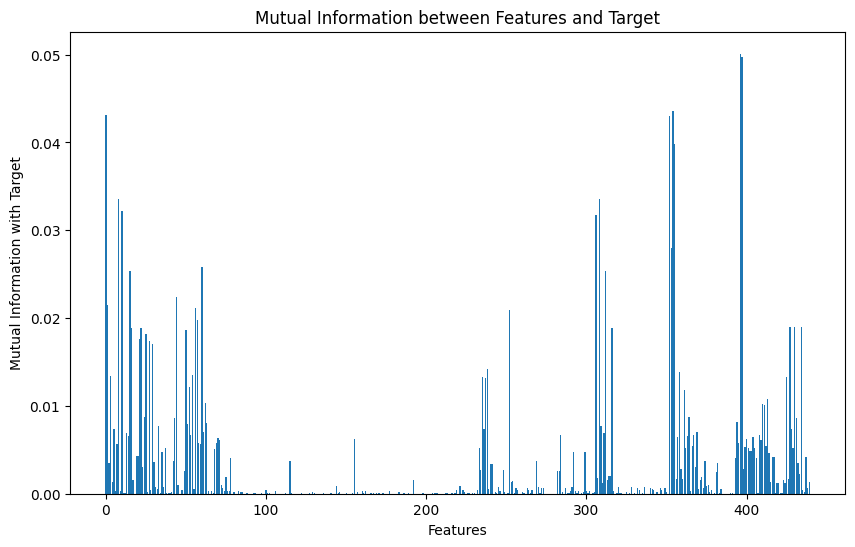

Dataset Information

Training Data
328135 samples
With labels: [0 1]
0: 91.17%
and 1: 8.83%

Test Data
109379 samples

Features
43 features:
The first column of the datasets is the "sample id" and is not in the dictionary

Features Dict Information

Total number of features: 43

Number of categorical features: 32
Number of numerical features: 11

Number of features to be discarded: 0

Categorical feature subtypes:
  undefined: 32

Numerical feature subtypes:
  undefined: 11

Encoding types:
  ordinal: 6
  one-hot: 10
  binary: 16


In [27]:
# On std dataset
# Keep only features with at least mi_threshold of
x_train_std_mi, x_test_std_mi, feature_names_std_mi, feature_dict_std_mi = select_features_based_on_correlation(
    x_train_std, y_train, x_test_std, feature_names_std, feature_dict_std, mi_threshold=0.01, display_plot=True
)

print_dataset_info(x_train_std_mi, y_train, x_test_std_mi, feature_dict_std_mi)
analyze_features_dict(feature_dict_std_mi)
 

Model specific parameters:
    gamma: 0.1
    max_iters: 1500
    class_weight: 1

Training model...
Training done in 1 min 12.67 s with last loss: 0.23111


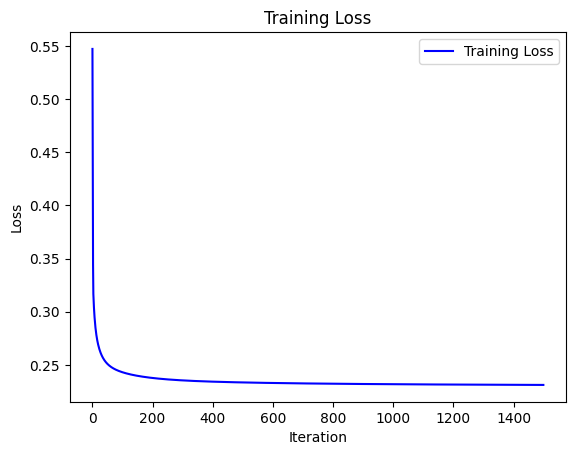

Metrics: Accuracy = 0.914, F1 Score = 0.144
Training and evaluation complete.
Results saved in ../results/logs/logistic_regression_20241030181302


In [31]:
# Train and test the model on the dataset with the selected features
x_train_split, y_train_split, _, x_val_split, y_val_split, _ = stratified_split(x_train_std_mi, y_train, train_ids)
hyperparameters["initial_w"] = np.zeros(x_train_split.shape[1])

w, loss = train_and_test(x_train_split, y_train_split, x_val_split, y_val_split, logistic_regression, verbose=True, **hyperparameters)
